**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier


## Load Dataset

In [36]:
# Load dataset
url = "https://raw.githubusercontent.com/sulthanahmed31/data-mining/refs/heads/main/bank.csv"
df = pd.read_csv(url, sep=';')


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [37]:
# Mengganti nama kolom agar lebih rapi (jika perlu)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

# Menghapus kolom atau baris yang memiliki nilai kosong (jika terlalu banyak nilai kosong)
df.dropna(axis=0, how='any', inplace=True)

# Menampilkan data yang sudah dirapikan
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [38]:
# 2. Distribusi variabel kategorikal
print("\nDistribusi Variabel Kategorikal:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n", df[col].value_counts())


Distribusi Variabel Kategorikal:

job:
 job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

marital:
 marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

education:
 education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

default:
 default
no     4445
yes      76
Name: count, dtype: int64

housing:
 housing
yes    2559
no     1962
Name: count, dtype: int64

loan:
 loan
no     3830
yes     691
Name: count, dtype: int64

contact:
 contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

month:
 month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
N

In [39]:
# 3. Pemeriksaan nilai kosong
print("\nPemeriksaan Nilai Kosong:")
print(data.isnull().sum())


Pemeriksaan Nilai Kosong:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


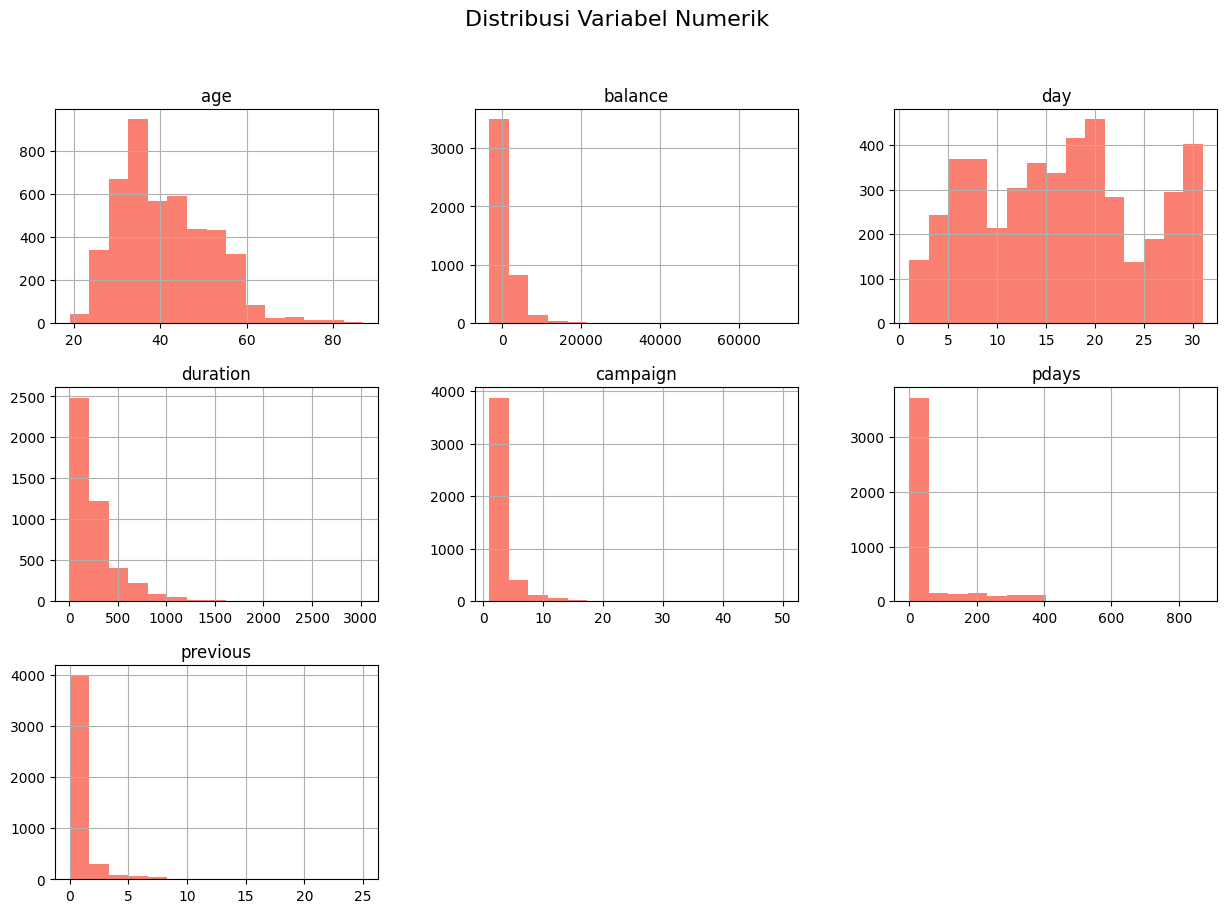

Output akan menampilkan skewness untuk setiap variabel serta indikasi apakah distribusinya normal atau miring, dan juga mendeteksi serta melaporkan outlier jika ada.


In [40]:
# 4. Visualisasi distribusi variabel numerik
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), color='salmon')
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()
print("Output akan menampilkan skewness untuk setiap variabel serta indikasi apakah distribusinya normal atau miring, dan juga mendeteksi serta melaporkan outlier jika ada.")

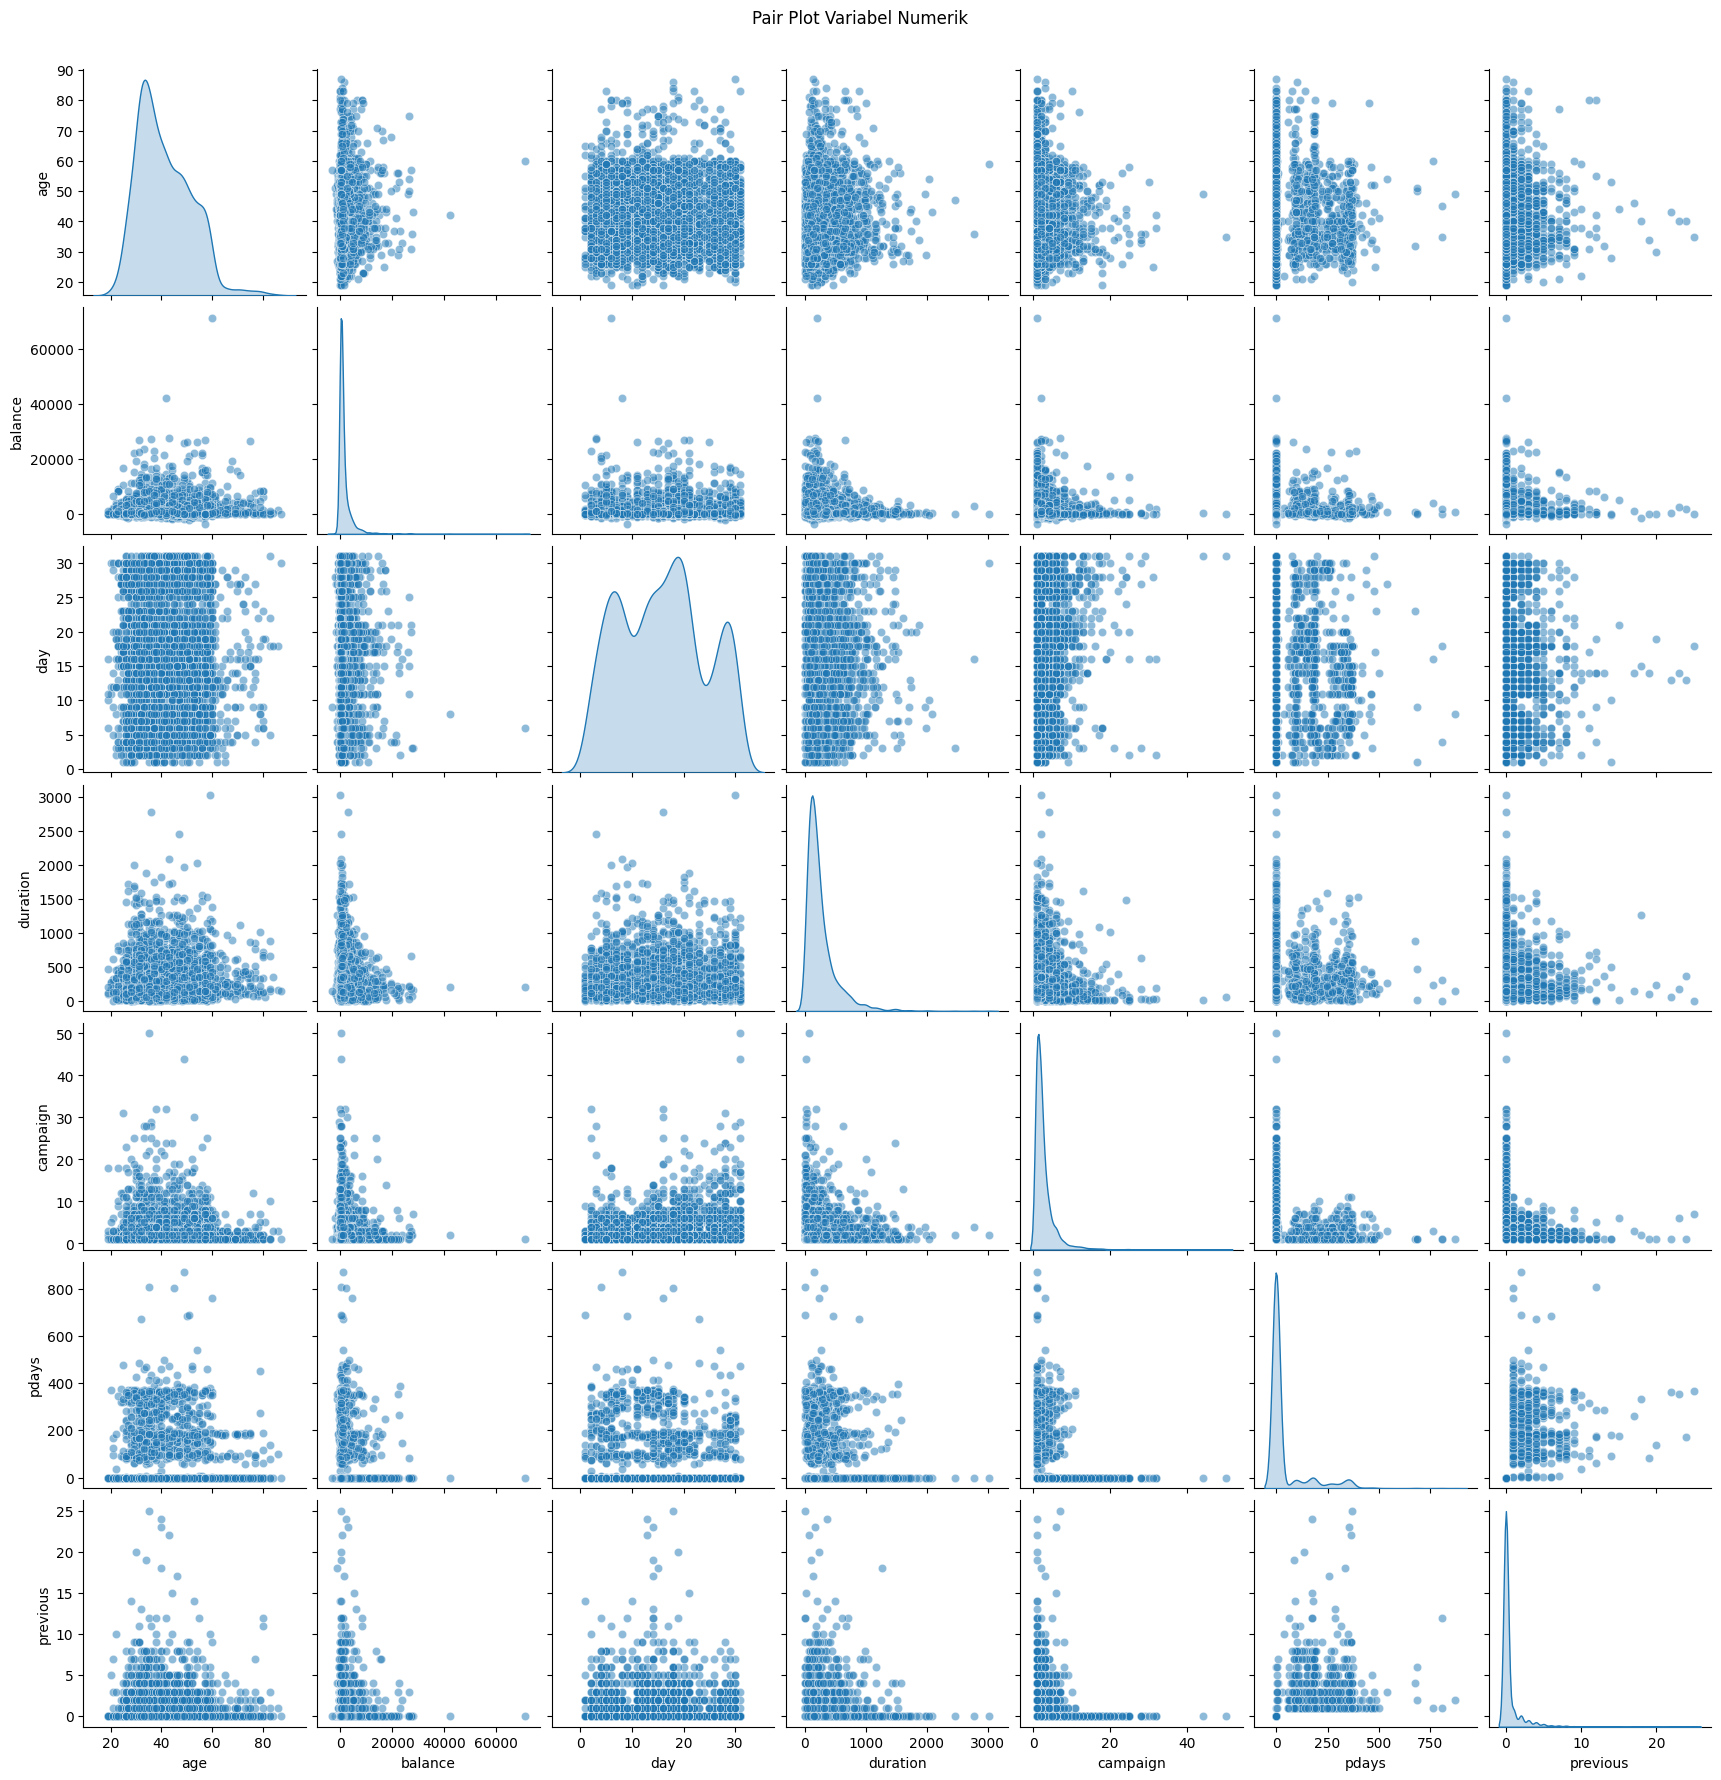

Pair Plot: Menampilkan scatter plot untuk semua pasangan variabel numerik, dengan histogram atau KDE (Kernel Density Estimate) pada diagonal. Ini berguna untuk melihat hubungan antar variabel.


In [41]:
#Pair Plot untuk melihat hubungan antar variabel numerik
sns.pairplot(df[numerical_columns], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot Variabel Numerik", y=1.02)
plt.show()
print ("Pair Plot: Menampilkan scatter plot untuk semua pasangan variabel numerik, dengan histogram atau KDE (Kernel Density Estimate) pada diagonal. Ini berguna untuk melihat hubungan antar variabel.")

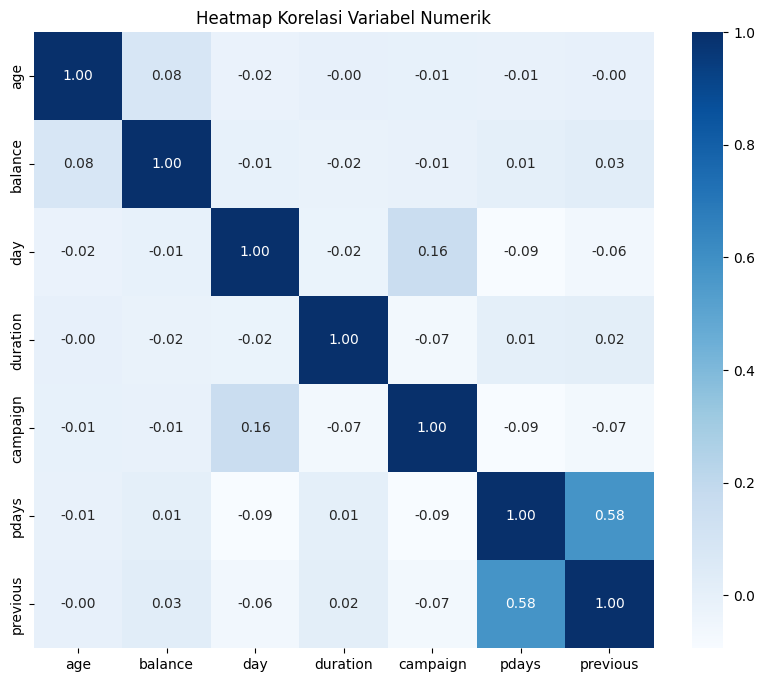

Heatmap Korelasi: Menampilkan korelasi antar variabel numerik dalam bentuk heatmap.
Pencarian Korelasi Tinggi: Setelah heatmap ditampilkan, script akan mencari pasangan variabel dengan korelasi tinggi (nilai absolut > 0.8) dan menampilkannya.


In [42]:
# 5. Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()
print ("Heatmap Korelasi: Menampilkan korelasi antar variabel numerik dalam bentuk heatmap.")
print ("Pencarian Korelasi Tinggi: Setelah heatmap ditampilkan, script akan mencari pasangan variabel dengan korelasi tinggi (nilai absolut > 0.8) dan menampilkannya.")

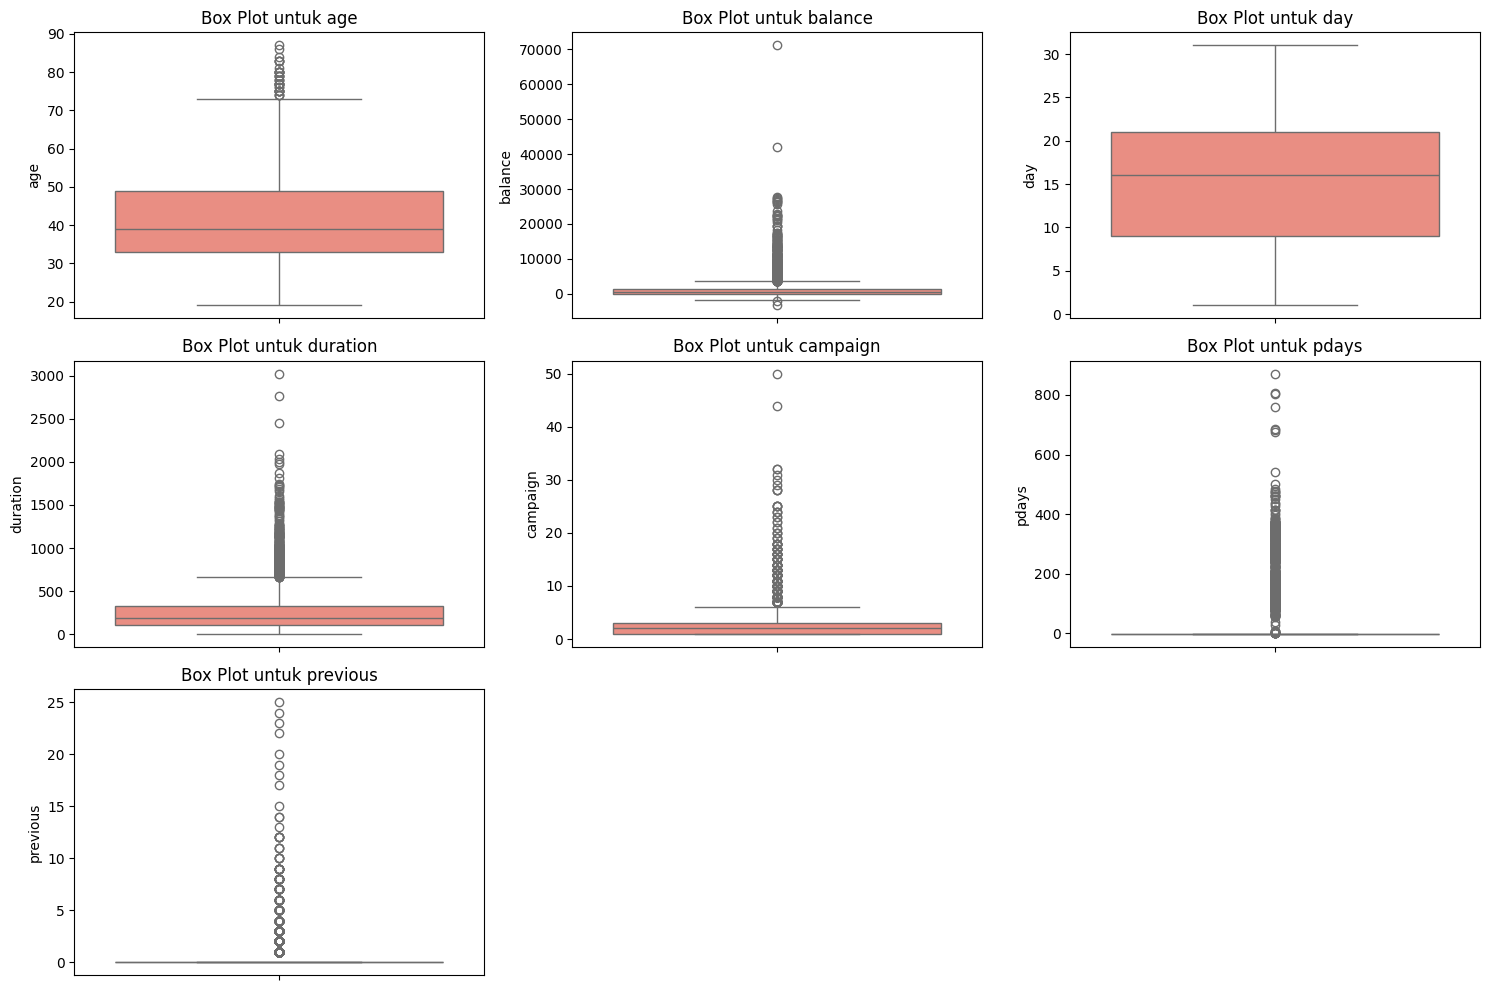

Menunjukkan distribusi data, median, dan mendeteksi outlier untuk setiap variabel numerik.


In [43]:
#Box Plot untuk setiap variabel numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Atur subplot 3x3
    sns.boxplot(df[column], color='salmon')
    plt.title(f"Box Plot untuk {column}")
plt.tight_layout()
plt.show()
print("Menunjukkan distribusi data, median, dan mendeteksi outlier untuk setiap variabel numerik.")

<ipython-input-44-2235743d2169>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Blues')


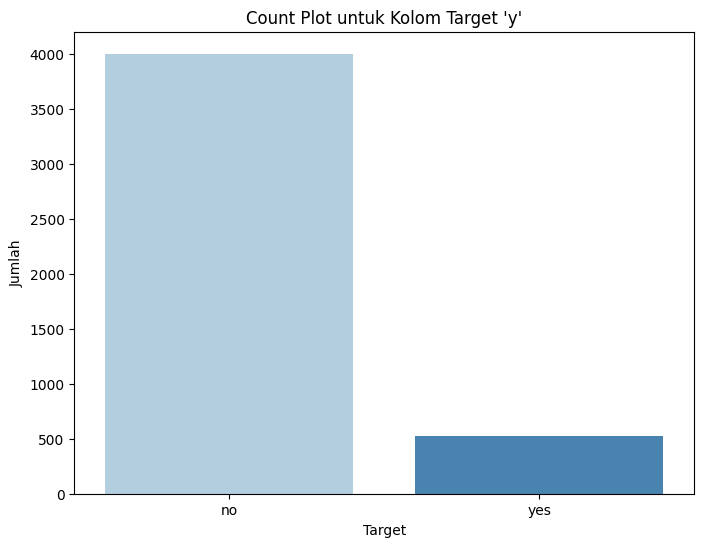

Count Plot: Menunjukkan jumlah observasi untuk setiap kategori dalam kolom target 'y'.


In [44]:
# Count Plot untuk kolom target 'y'
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df, palette='Blues')
plt.title("Count Plot untuk Kolom Target 'y'")
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.show()
print("Count Plot: Menunjukkan jumlah observasi untuk setiap kategori dalam kolom target 'y'.")

## Machine Learning

In [28]:
# Encode variabel kategorikal
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [29]:
# Memisahkan fitur dan target (asumsikan kolom 'y' sebagai target)
X = df.drop(columns='y')
y = df['y']

In [30]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [48]:
# a. Defining the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# b. Predict the test set results
y_pred = model.predict(X_test)

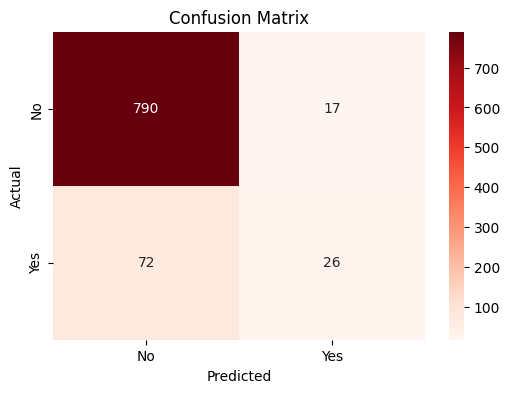

In [51]:
# d. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
# Check accuracy score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")




Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.27      0.37        98

    accuracy                           0.90       905
   macro avg       0.76      0.62      0.66       905
weighted avg       0.88      0.90      0.88       905

Akurasi: 0.90


In [53]:
# f. Results and conclusion
print("\nResults and Conclusion:")
print(f"Model Random Forest memiliki akurasi sebesar {accuracy:.2f}.")
print("- Precision dan Recall dari masing-masing kelas ditampilkan dalam classification report.")
print("- Confusion matrix menunjukkan berapa banyak prediksi benar dan salah untuk setiap kelas.")
print("Secara keseluruhan, model ini menunjukkan performa yang baik jika precision dan recall cukup tinggi.")


Results and Conclusion:
Model Random Forest memiliki akurasi sebesar 0.90.
- Precision dan Recall dari masing-masing kelas ditampilkan dalam classification report.
- Confusion matrix menunjukkan berapa banyak prediksi benar dan salah untuk setiap kelas.
Secara keseluruhan, model ini menunjukkan performa yang baik jika precision dan recall cukup tinggi.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [55]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
# b. Predict the test set results
y_pred = model.predict(X_test)

In [57]:
# c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.89


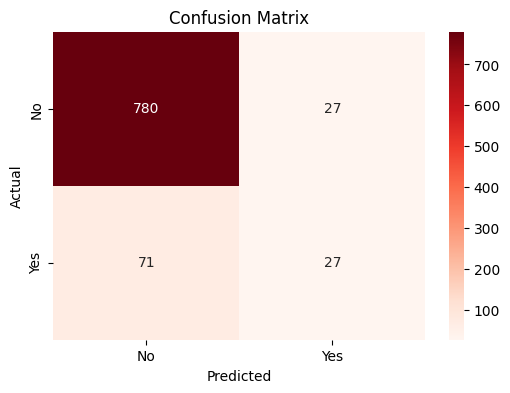

In [58]:
# d. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# e. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.50      0.28      0.36        98

    accuracy                           0.89       905
   macro avg       0.71      0.62      0.65       905
weighted avg       0.87      0.89      0.88       905



In [60]:
# f. Results and conclusion
print("\nResults and Conclusion:")
print(f"Model Gradient Boosting memiliki akurasi sebesar {accuracy:.2f}.")
print("- Precision dan Recall dari masing-masing kelas ditampilkan dalam classification report.")
print("- Confusion matrix menunjukkan berapa banyak prediksi benar dan salah untuk setiap kelas.")
print("Secara keseluruhan, model ini menunjukkan performa yang baik jika precision dan recall cukup tinggi.")


Results and Conclusion:
Model Gradient Boosting memiliki akurasi sebesar 0.89.
- Precision dan Recall dari masing-masing kelas ditampilkan dalam classification report.
- Confusion matrix menunjukkan berapa banyak prediksi benar dan salah untuk setiap kelas.
Secara keseluruhan, model ini menunjukkan performa yang baik jika precision dan recall cukup tinggi.
